**Chapter 3 – Classification**

_This notebook contains all the sample code and solutions to the exercises in chapter 3._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
28 * 28

784

Saving figure some_digit_plot


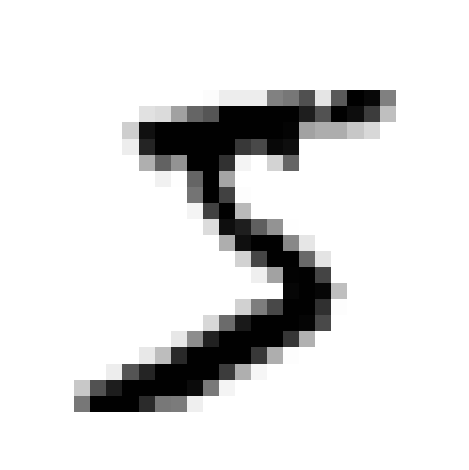

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [8]:
y[0]

'5'

In [9]:
y = y.astype(np.uint8)

In [10]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [11]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


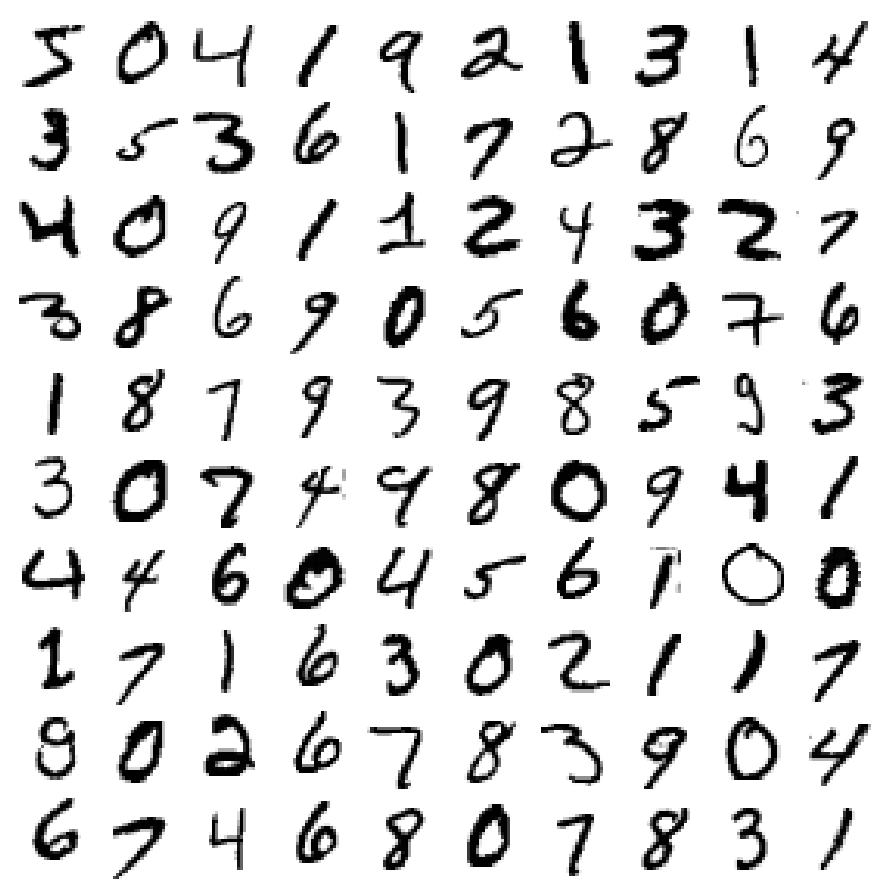

In [12]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [13]:
y[0]

5

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_30000 = y[:30000]
X_train_30000 = y[:30000]

# Training a Binary Classifier

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([some_digit])

array([ True])

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [24]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [25]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Confusion Matrix

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [29]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

In [31]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [32]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [33]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

## Precision/Recall Trade-off

In [35]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [36]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [37]:
y_some_digit_pred

array([ True])

In [38]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [40]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


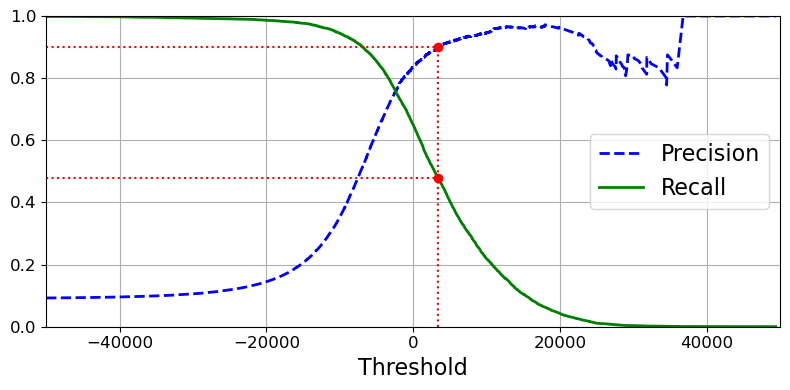

In [45]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [55]:
(y_train_pred == (y_scores > 0)).all()

True

Saving figure precision_vs_recall_plot


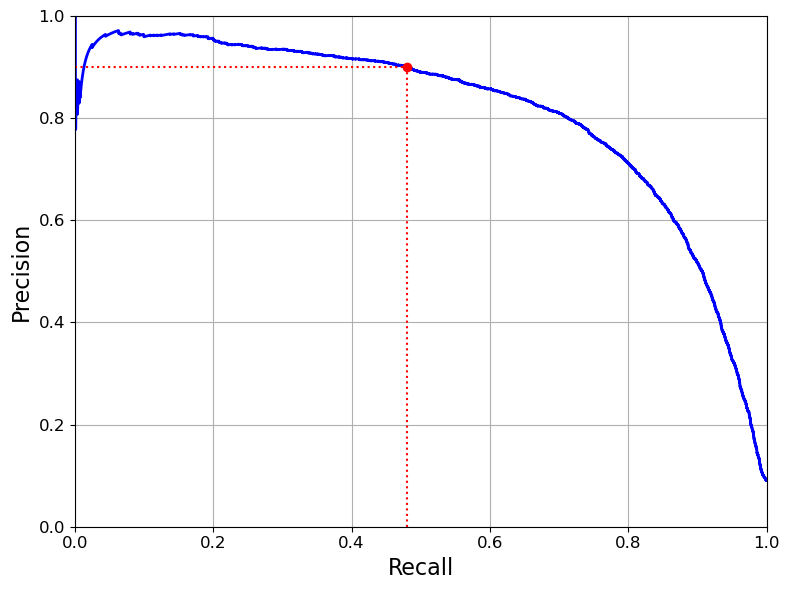

In [56]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [57]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [58]:
threshold_90_precision

3370.019499144183

In [59]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [60]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [61]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## The ROC Curve

In [63]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


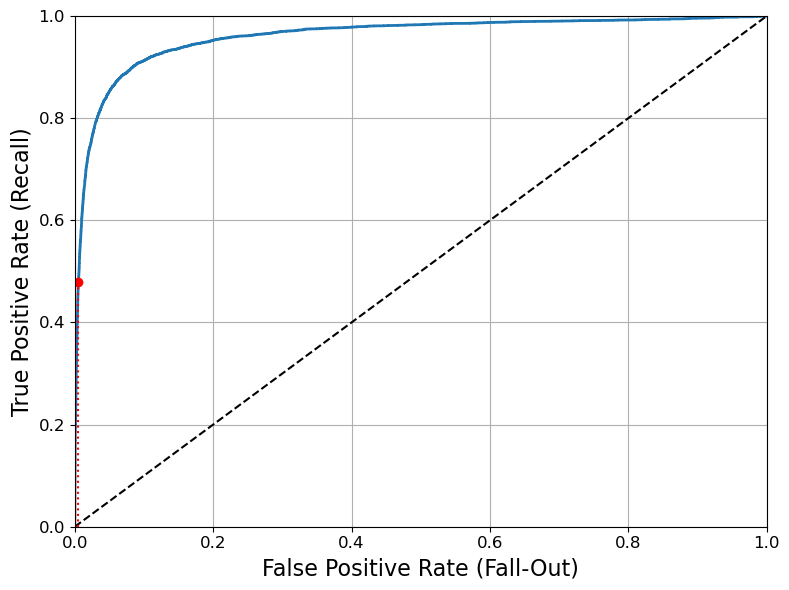

In [64]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [66]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [67]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


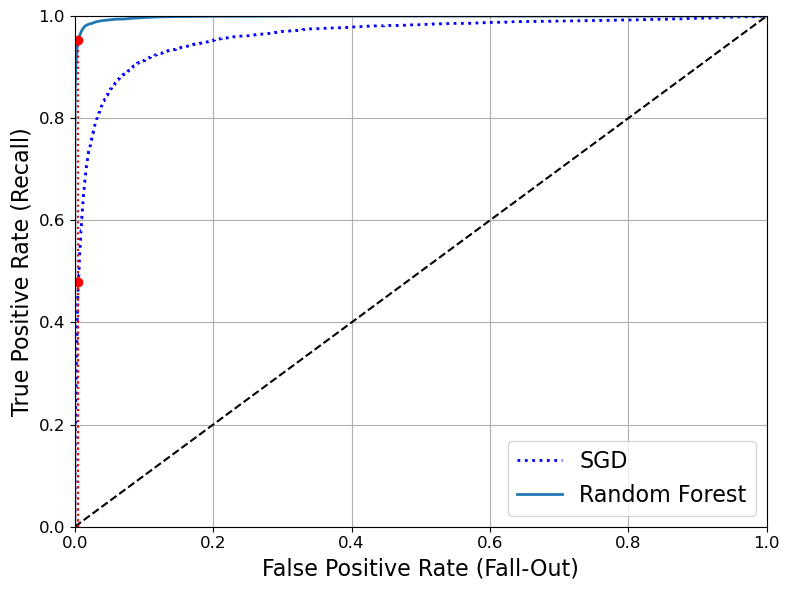

In [68]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [69]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983296721818179

In [70]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9898819561551433

In [71]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

# Multiclass Classification

In [73]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [74]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [75]:
np.argmax(some_digit_scores)

5

In [76]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [77]:
svm_clf.classes_[5]

5

In [78]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [79]:
len(ovr_clf.estimators_)

10

In [80]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [81]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [82]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# Error Analysis

In [71]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [72]:
# since sklearn 0.22, you can use sklearn.metrics.plot_confusion_matrix()
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


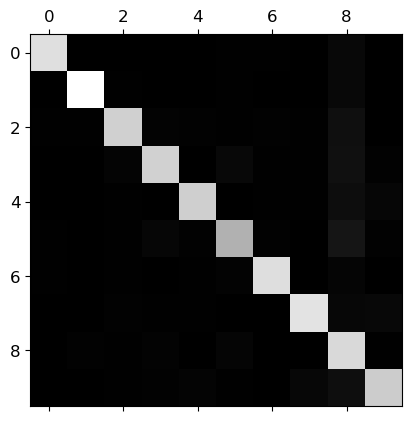

In [73]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [74]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


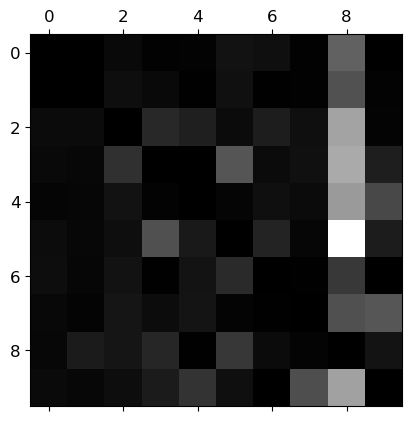

In [75]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Saving figure error_analysis_digits_plot


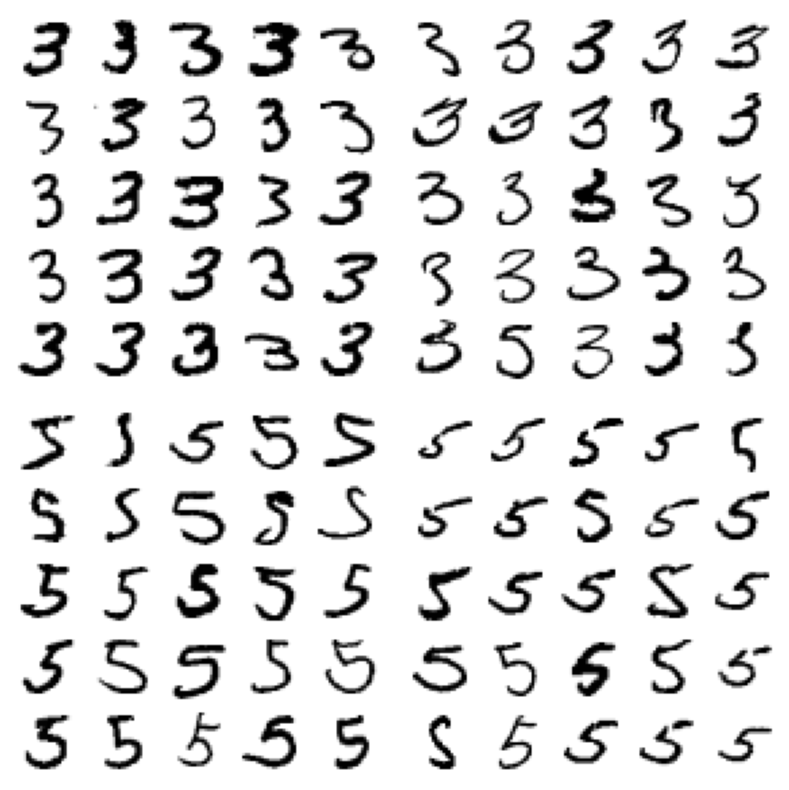

In [76]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel Classification

In [87]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [88]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [89]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

# Multioutput Classification

In [91]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_digit_example_plot


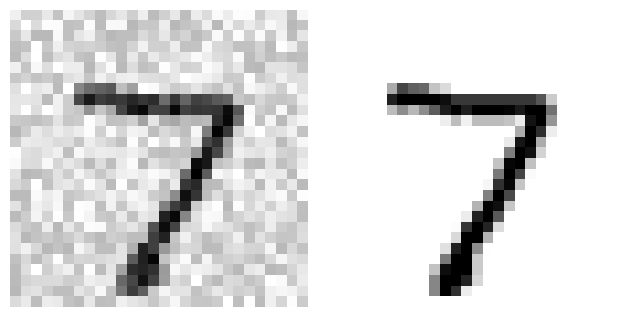

In [92]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Saving figure cleaned_digit_example_plot


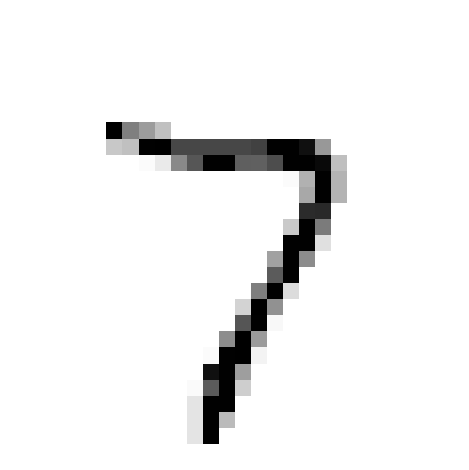

In [93]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

# Comparison between classifiers

## Dummy (ie. random) classifier

In [87]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier(strategy="prior")
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

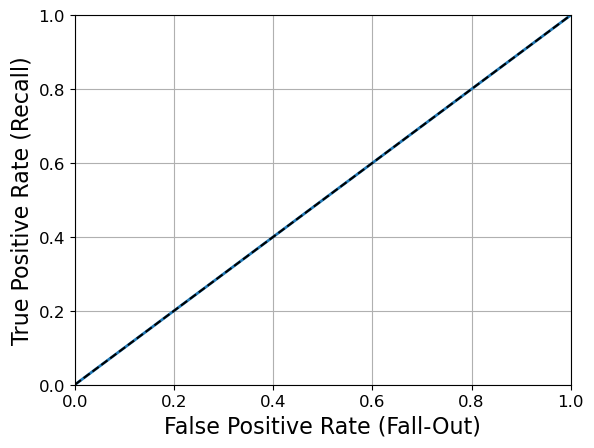

In [88]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

## KNN classifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [96]:
y_knn_pred = knn_clf.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

/var/folders/nb/7tdjzjb96030ypwzz43_rpd40000gn/T/ipykernel_48563/3518175631.py:1: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


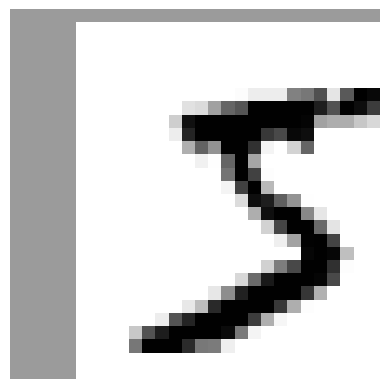

In [98]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [99]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [100]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [101]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [102]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [103]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

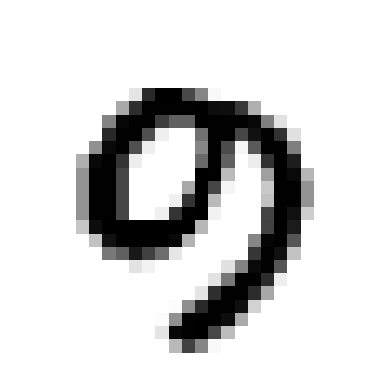

In [104]:
plot_digit(ambiguous_digit)

## 1. A RandomForestClassifier With Best Accuracy

In [106]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [50, 100, 200], 'max_features': [10, 20, 30]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]


random_clf = RandomForestClassifier()

grid_search = GridSearchCV(random_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ..max_features=10, n_estimators=50;, score=0.961 total time=   3.6s
[CV 2/5] END ..max_features=10, n_estimators=50;, score=0.960 total time=   3.5s
[CV 3/5] END ..max_features=10, n_estimators=50;, score=0.958 total time=   3.5s
[CV 4/5] END ..max_features=10, n_estimators=50;, score=0.957 total time=   3.5s
[CV 5/5] END ..max_features=10, n_estimators=50;, score=0.967 total time=   3.5s
[CV 1/5] END .max_features=10, n_estimators=100;, score=0.965 total time=   6.9s
[CV 2/5] END .max_features=10, n_estimators=100;, score=0.965 total time=   7.0s
[CV 3/5] END .max_features=10, n_estimators=100;, score=0.960 total time=   6.9s
[CV 4/5] END .max_features=10, n_estimators=100;, score=0.960 total time=   7.0s
[CV 5/5] END .max_features=10, n_estimators=100;, score=0.968 total time=   7.0s
[CV 1/5] END .max_features=10, n_estimators=200;, score=0.967 total time=  13.8s
[CV 2/5] END .max_features=10, n_estimators=200;

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [10, 20, 30],
                          'n_estimators': [50, 100, 200]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             verbose=3)

In [107]:
random_params = grid_search.best_params_
random_params

{'max_features': 30, 'n_estimators': 200}

In [108]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
random_accuracy = accuracy_score(y_test, y_pred)
random_accuracy

0.9705

## 1. A SGDClassifier With Best Accuracy

In [111]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'loss': ['hinge'],
    'alpha': [0.001],
    'penalty': ['elasticnet'],
    'max_iter': [2000],
    'tol': [1e-3, 1e-4]
}

sgd_clf = SGDClassifier()

grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END alpha=0.001, loss=hinge, max_iter=2000, penalty=elasticnet, tol=0.001;, score=0.872 total time= 1.5min
[CV 2/5] END alpha=0.001, loss=hinge, max_iter=2000, penalty=elasticnet, tol=0.001;, score=0.883 total time= 1.6min
[CV 3/5] END alpha=0.001, loss=hinge, max_iter=2000, penalty=elasticnet, tol=0.001;, score=0.864 total time= 1.5min
[CV 4/5] END alpha=0.001, loss=hinge, max_iter=2000, penalty=elasticnet, tol=0.001;, score=0.876 total time= 1.6min
[CV 5/5] END alpha=0.001, loss=hinge, max_iter=2000, penalty=elasticnet, tol=0.001;, score=0.858 total time= 1.4min
[CV 1/5] END alpha=0.001, loss=hinge, max_iter=2000, penalty=elasticnet, tol=0.0001;, score=0.867 total time= 1.3min
[CV 2/5] END alpha=0.001, loss=hinge, max_iter=2000, penalty=elasticnet, tol=0.0001;, score=0.852 total time= 1.4min
[CV 3/5] END alpha=0.001, loss=hinge, max_iter=2000, penalty=elasticnet, tol=0.0001;, score=0.884 total time= 1.5min
[CV 4/5] 

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.001], 'loss': ['hinge'],
                         'max_iter': [2000], 'penalty': ['elasticnet'],
                         'tol': [0.001, 0.0001]},
             verbose=3)

In [112]:
sgd_params = grid_search.best_params_
sgd_params

{'alpha': 0.001,
 'loss': 'hinge',
 'max_iter': 2000,
 'penalty': 'elasticnet',
 'tol': 0.001}

In [113]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
sgd_accuracy = accuracy_score(y_test, y_pred)
sgd_accuracy

0.8875

## 1. An OVRClassifier With Best Accuracy

In [115]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:10000], y_train[:10000]) 

from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:10000], y_train[:10000])

OneVsRestClassifier(estimator=SVC(gamma='auto', random_state=42))

In [116]:
from sklearn.metrics import accuracy_score

y_pred = ovr_clf.predict(X_test)
ovr_accuracy = accuracy_score(y_test, y_pred)
ovr_accuracy

0.1135

## 1. A KNNClassifier With Over 97% Accuracy

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  14.6s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  14.5s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  15.4s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  15.8s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  15.9s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  15.8s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  15.5s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  15.6s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  15.4s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  15.3s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  12.5s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [119]:
knn_params = grid_search.best_params_
knn_params

{'n_neighbors': 4, 'weights': 'distance'}

In [120]:
grid_search.best_score_

0.9716166666666666

In [121]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.9714

## 1. Comparison between the Classifiers

In [123]:
import pandas as pd

comparison_df = pd.DataFrame({ 'Model': ['OneVsRestClassifier', 'SGDClassifier', 'RandomForestClassifier', 'KNNClassifier'], 
                              'Best Accuracy': [ovr_accuracy, sgd_accuracy, random_accuracy, knn_accuracy], 
                              'Best Parameters': ['gamma = auto', sgd_params, random_params, knn_params] })

pd.set_option('display.max_colwidth', None) 
comparison_df

,Model,Best Accuracy,Best Parameters
0,OneVsRestClassifier,0.1135,gamma = auto
1,SGDClassifier,0.8875,"{'alpha': 0.001, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'elasticnet', 'tol': 0.001}"
2,RandomForestClassifier,0.9705,"{'max_features': 30, 'n_estimators': 200}"
3,KNNClassifier,0.9714,"{'n_neighbors': 4, 'weights': 'distance'}"


In [124]:
y_train_pred_knn = cross_val_predict(knn_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_knn)

array([[5882,    4,    5,    0,    1,    5,   19,    1,    2,    4],
       [   2, 6705,   10,    2,    1,    1,    3,   11,    2,    5],
       [  51,   60, 5695,   15,   11,    4,    9,   87,   17,    9],
       [   8,   16,   39, 5903,    1,   63,    4,   40,   33,   24],
       [   3,   53,    1,    1, 5628,    0,   13,   11,    2,  130],
       [  14,   18,    4,   67,    6, 5211,   58,    7,   11,   25],
       [  24,   13,    1,    0,    5,   27, 5846,    0,    2,    0],
       [   4,   68,   14,    3,   20,    1,    0, 6083,    3,   69],
       [  25,   85,   15,   87,   35,  111,   26,   19, 5382,   66],
       [  19,   13,    5,   45,   46,   12,    5,   79,   15, 5710]])

In [125]:
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
y_train_pred_random = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

sgd_precision = precision_score(y_train, y_train_pred_sgd, average='weighted')
sgd_recall = recall_score(y_train, y_train_pred_sgd, average='weighted')
sgd_f1 = f1_score(y_train, y_train_pred_sgd, average='weighted')

knn_precision = precision_score(y_train, y_train_pred_knn, average='weighted')
knn_recall = recall_score(y_train, y_train_pred_knn, average='weighted')
knn_f1 = f1_score(y_train, y_train_pred_knn, average='weighted')

random_precision = precision_score(y_train, y_train_pred_random, average='weighted')
random_recall = recall_score(y_train, y_train_pred_random, average='weighted')
random_f1 = f1_score(y_train, y_train_pred_random, average='weighted')

In [126]:
import pandas as pd

comparison_df = pd.DataFrame({ 'Model': ['SGDClassifier', 'RandomForestClassifier', 'KNNClassifier'], 
                              'Precision': [sgd_precision, random_precision, knn_precision], 
                              'Recall': [sgd_recall, random_recall, knn_recall], 
                             'F1-score': [sgd_f1, random_f1, knn_f1]})

pd.set_option('display.max_colwidth', None) 
comparison_df

,Model,Precision,Recall,F1-score
0,SGDClassifier,0.876687,0.874900,0.874762
1,RandomForestClassifier,0.880513,0.878667,0.879031
2,KNNClassifier,0.967676,0.967417,0.967345


-- Epoch 1
Norm: 711.86, NNZs: 595, Bias: -27.858516, T: 70000, Avg. loss: 6279.089818
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 440.96, NNZs: 585, Bias: -29.089019, T: 140000, Avg. loss: 402.483022
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 349.02, NNZs: 569, Bias: -29.752782, T: 210000, Avg. loss: 215.438920
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 295.65, NNZs: 570, Bias: -30.195864, T: 280000, Avg. loss: 149.085781
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 261.33, NNZs: 575, Bias: -30.502200, T: 350000, Avg. loss: 113.229581
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 234.06, NNZs: 562, Bias: -30.771928, T: 420000, Avg. loss: 90.819601
Total training time: 0.62 seconds.
-- Epoch 7
Norm: 215.58, NNZs: 554, Bias: -30.993273, T: 490000, Avg. loss: 74.394454
Total training time: 0.73 seconds.
-- Epoch 8
Norm: 201.06, NNZs: 551, Bias: -31.174847, T: 560000, Avg. loss: 62.800076
Total training time: 0.83 seconds.
-- Epoch 9
Norm: 189.64, NN

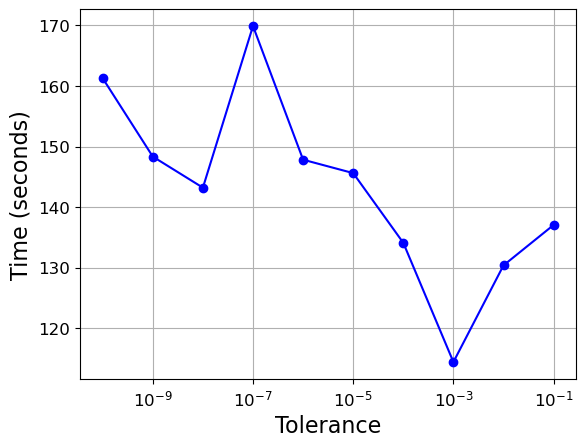

In [150]:
import time
sgd_clf = SGDClassifier(alpha=0.001, loss='hinge', max_iter=2000, penalty='elasticnet', tol=0.001, verbose=1)

tol = 0.1
tols = []
times = []
for i in range(10):
    sgd_clf
    t1 = time.time()
    sgd_clf.fit(X, y)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(i, tol, t2-t1)
    tol /= 10
plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

0 0.1 0.18114995956420898
1 0.01 0.07673192024230957
2 0.001 0.07304120063781738
3 0.0001 0.07488608360290527
4 1e-05 0.07515311241149902
5 1.0000000000000002e-06 0.0739750862121582
6 1.0000000000000002e-07 0.07464027404785156
7 1.0000000000000002e-08 0.07651901245117188
8 1.0000000000000003e-09 0.07737207412719727
9 1.0000000000000003e-10 0.07623696327209473


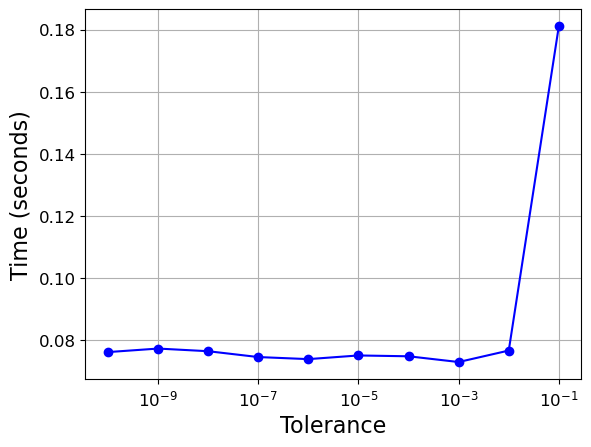

In [157]:
import time
knn_clf = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')

tol = 0.1
tols = []
times = []
for i in range(10):
    knn_clf
    t1 = time.time()
    knn_clf.fit(X, y)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(i, tol, t2-t1)
    tol /= 10
plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

0 0.1 58.641743898391724
1 0.01 58.954439878463745
2 0.001 58.81525206565857
3 0.0001 64.17980885505676
4 1e-05 69.70691299438477
5 1.0000000000000002e-06 67.4037139415741
6 1.0000000000000002e-07 67.13682103157043
7 1.0000000000000002e-08 67.53769016265869
8 1.0000000000000003e-09 71.49371290206909
9 1.0000000000000003e-10 68.91360807418823


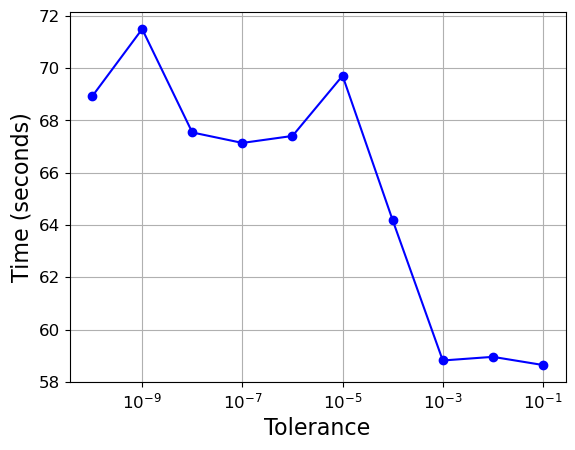

In [161]:
import time
random_clf = RandomForestClassifier(max_features = 30, n_estimators = 200)

tol = 0.1
tols = []
times = []
for i in range(10):
    random_clf
    t1 = time.time()
    random_clf.fit(X, y)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(i, tol, t2-t1)
    tol /= 10
plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()